# Predicting Online Shoppers’ Purchasing Intentions

## Exploratory Data Analysis

__Importing Necessary Libraries and Packages__

In [1]:
# Data manipulation
import pandas as pd
import numpy as np
from collections import Counter

# Visualization
import seaborn as sns
from matplotlib import pyplot as plt

# Machine Learning and Preprocessing
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV, KFold, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder, RobustScaler, FunctionTransformer
from sklearn.impute import SimpleImputer
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, make_scorer
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import StackingClassifier
from sklearn.metrics import matthews_corrcoef, roc_auc_score, average_precision_score

# Imbalanced data handling
from imblearn.over_sampling import SMOTE

# Models
from sklearn.ensemble import StackingRegressor, RandomForestClassifier, BaggingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.svm import SVR
from xgboost import XGBRegressor, XGBClassifier, plot_importance, cv
from keras.models import Sequential
from keras.layers import Dense, Input
from keras.initializers import RandomUniform, GlorotUniform, Zeros
from sklearn.metrics import f1_score, matthews_corrcoef, roc_auc_score, average_precision_score

# Hyperparameter tuning
from hyperopt import hp, fmin, tpe, Trials, STATUS_OK

# Warnings
import warnings
warnings.filterwarnings('ignore')
#### Pandas Setting

pd.set_option('display.max_columns', 100)  
pd.set_option('display.max_rows', 100)     
pd.set_option('display.float_format', lambda x: '%.2f' % x)
pd.set_option('display.width', 100)

__Firs Looking of Data__

In [2]:
data = pd.read_csv('online_shoppers_intention.csv')
data.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.00,0,0.00,1,0.00,0.20,0.20,0.00,0.00,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.00,0,0.00,2,64.00,0.00,0.10,0.00,0.00,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.00,0,0.00,1,0.00,0.20,0.20,0.00,0.00,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.00,0,0.00,2,2.67,0.05,0.14,0.00,0.00,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.00,0,0.00,10,627.50,0.02,0.05,0.00,0.00,Feb,3,3,1,4,Returning_Visitor,True,False


In [3]:
data.shape

(12330, 18)

In [4]:
data.columns

Index(['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration',
       'ProductRelated', 'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues',
       'SpecialDay', 'Month', 'OperatingSystems', 'Browser', 'Region', 'TrafficType',
       'VisitorType', 'Weekend', 'Revenue'],
      dtype='object')

In [5]:
data.duplicated().sum()

125

In [6]:
data.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [8]:
for x in data.columns:
    print(x, len(data[x].value_counts()))

Administrative 27
Administrative_Duration 3335
Informational 17
Informational_Duration 1258
ProductRelated 311
ProductRelated_Duration 9551
BounceRates 1872
ExitRates 4777
PageValues 2704
SpecialDay 6
Month 10
OperatingSystems 8
Browser 13
Region 9
TrafficType 20
VisitorType 3
Weekend 2
Revenue 2


__Grabbing Categorical and Numerical Columns__

In [9]:
cat_cols = ['Month', 'VisitorType', 'SpecialDay', 'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'Weekend', 'Revenue']
num_cols = [col for col in data.columns if col not in cat_cols]

**Analysis of Categorical Features and Their Relationship with Revenue**

In [10]:
for col in cat_cols:
    print(col)

Month
VisitorType
SpecialDay
OperatingSystems
Browser
Region
TrafficType
Weekend
Revenue


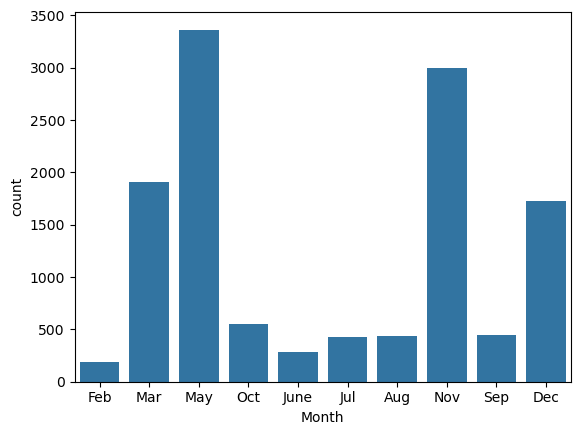

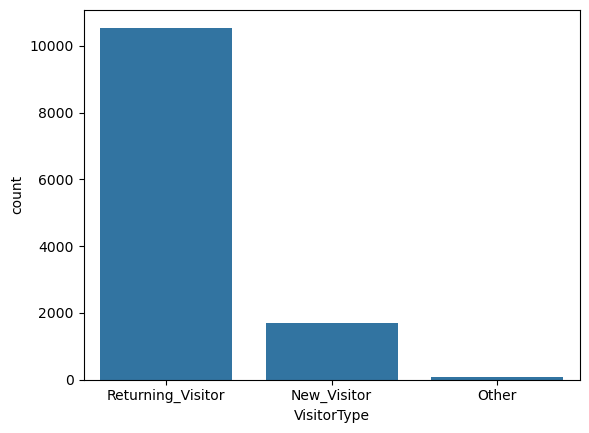

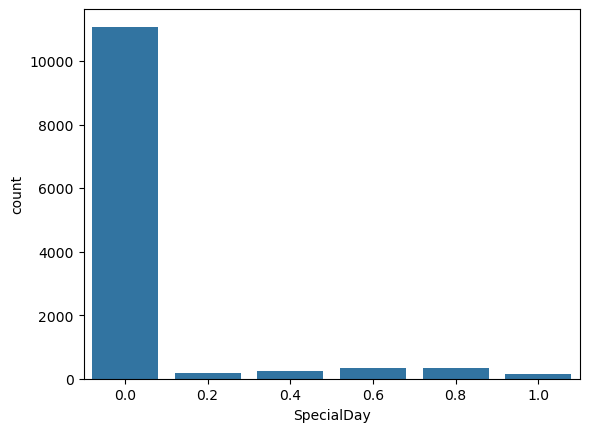

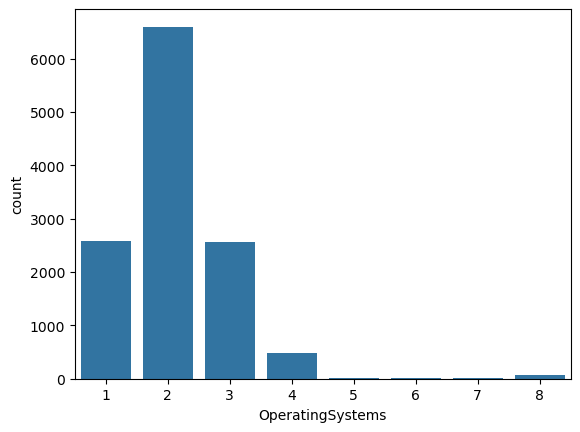

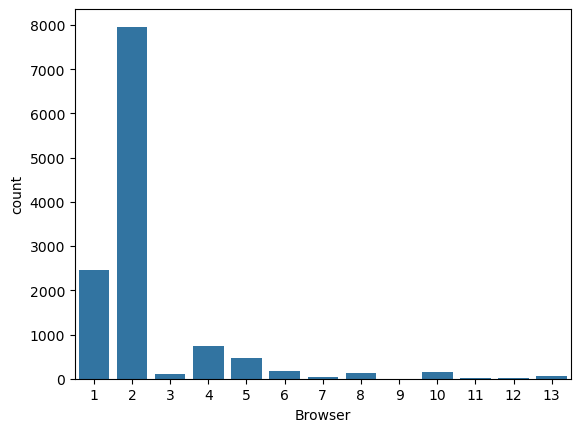

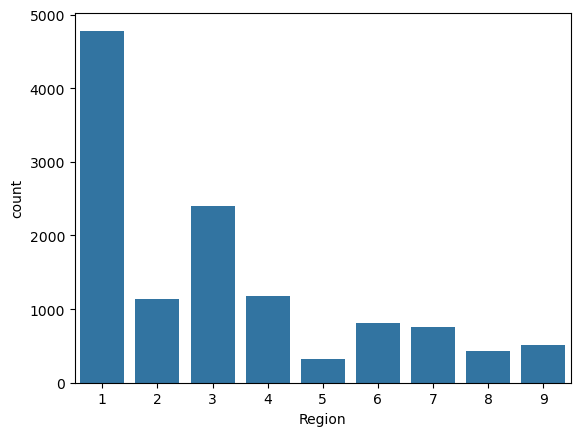

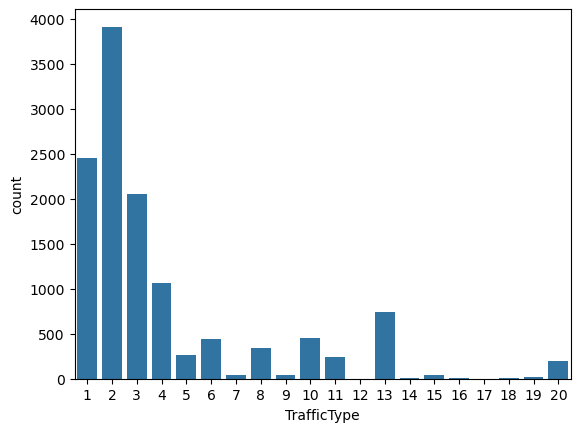

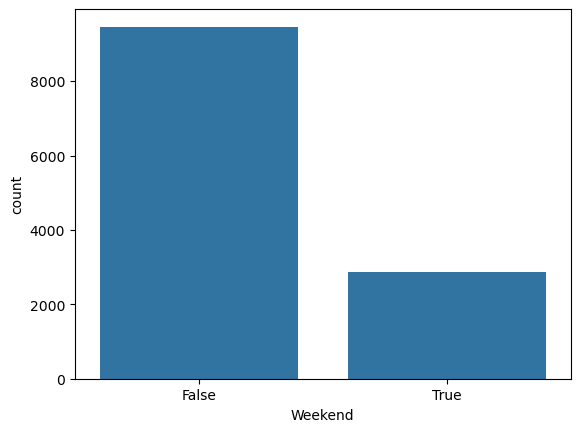

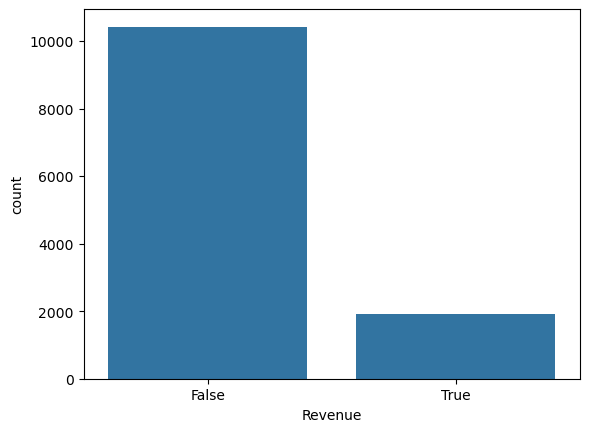

In [11]:
# Looking distrubition of each category in cat_cols:

def cat_distrubition(dataframe, col_name, plot=False):
    if plot:
        sns.countplot(x=dataframe[col_name], data=dataframe)
        plt.show(block=True)

for col in cat_cols:
    cat_distrubition(data, col, plot=True)
                

In [12]:
# Looking count, ratio and target mean of each category in cat_cols:

def cat_analyser(dataframe, target, cat_cols):
    for col in cat_cols:
        print(col, ":", len(dataframe[col].value_counts()))
        print(pd.DataFrame({"COUNT": dataframe[col].value_counts(),
                            "RATIO": dataframe[col].value_counts() / len(dataframe),
                            "TARGET_MEAN": dataframe.groupby(col)[target].mean()}), end="\n\n\n")


cat_analyser(data, "Revenue", cat_cols)

Month : 10
       COUNT  RATIO  TARGET_MEAN
Month                           
Aug      433   0.04         0.18
Dec     1727   0.14         0.13
Feb      184   0.01         0.02
Jul      432   0.04         0.15
June     288   0.02         0.10
Mar     1907   0.15         0.10
May     3364   0.27         0.11
Nov     2998   0.24         0.25
Oct      549   0.04         0.21
Sep      448   0.04         0.19


VisitorType : 3
                   COUNT  RATIO  TARGET_MEAN
VisitorType                                 
New_Visitor         1694   0.14         0.25
Other                 85   0.01         0.19
Returning_Visitor  10551   0.86         0.14


SpecialDay : 6
            COUNT  RATIO  TARGET_MEAN
SpecialDay                           
0.00        11079   0.90         0.17
0.20          178   0.01         0.08
0.40          243   0.02         0.05
0.60          351   0.03         0.08
0.80          325   0.03         0.03
1.00          154   0.01         0.06


OperatingSystems : 8
      

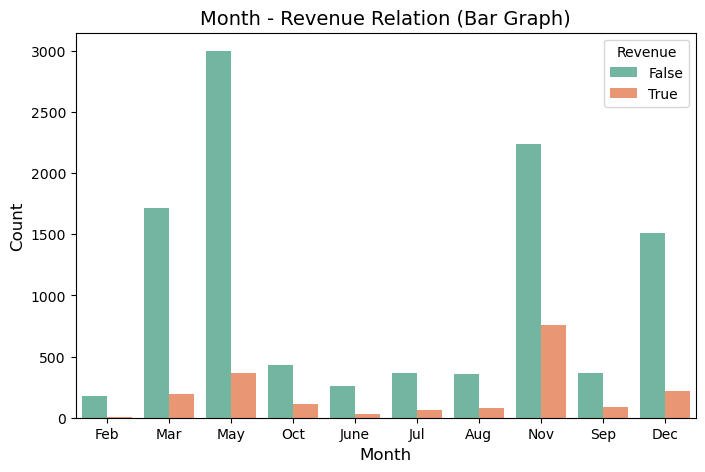

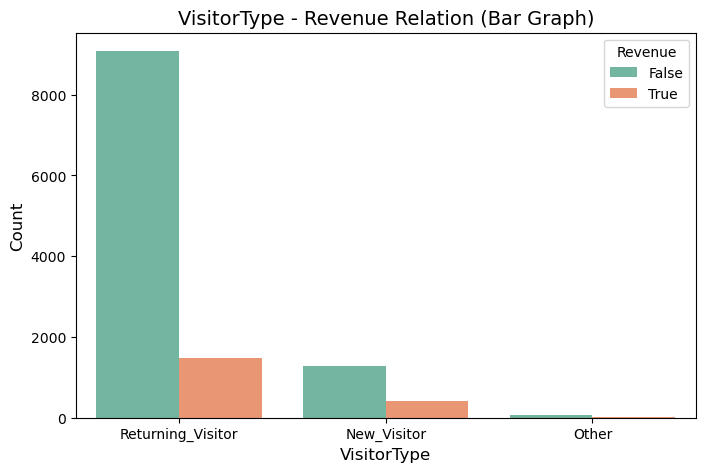

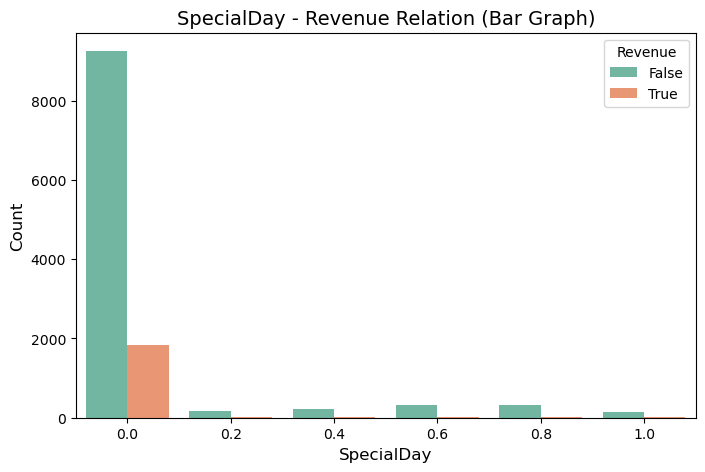

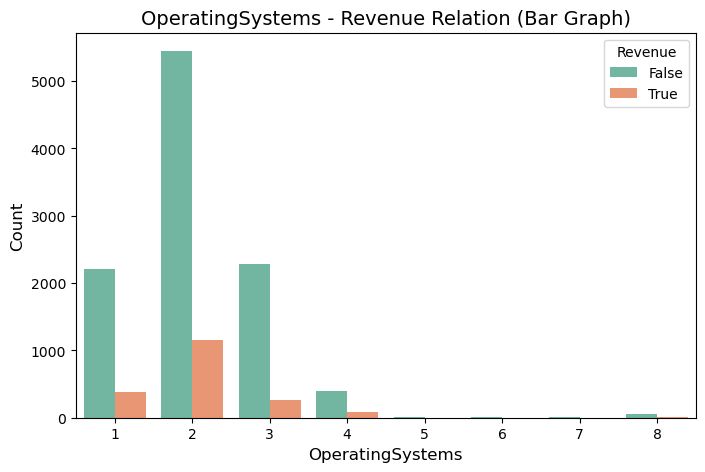

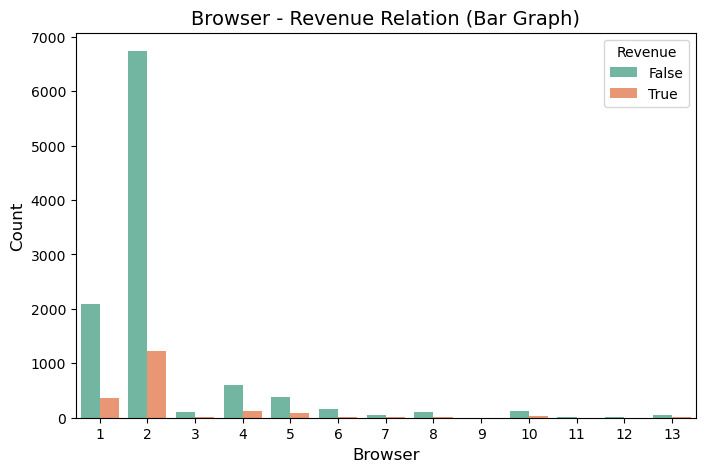

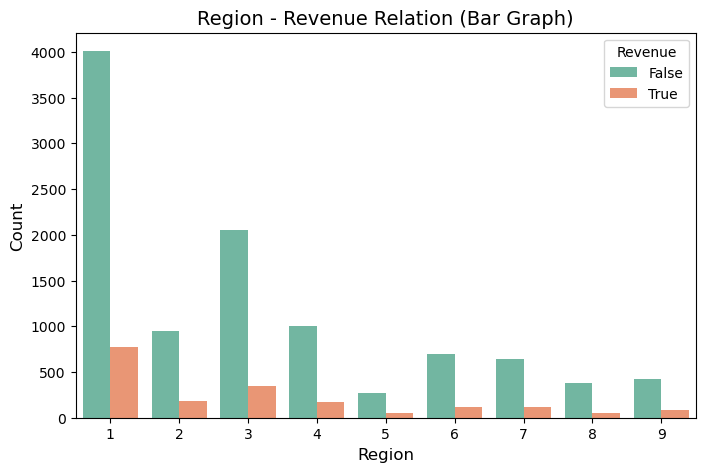

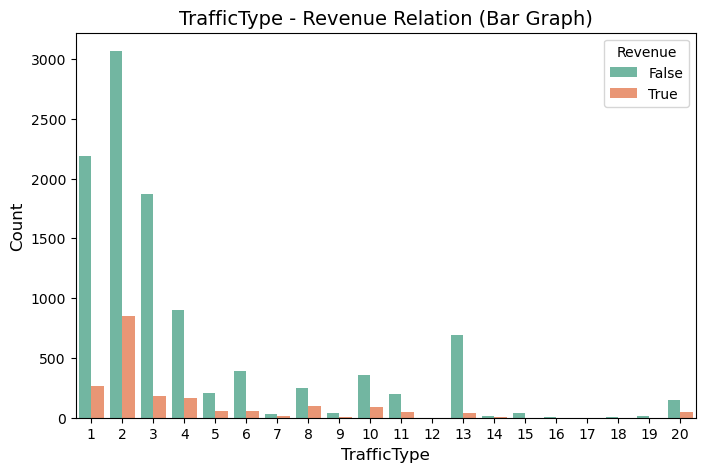

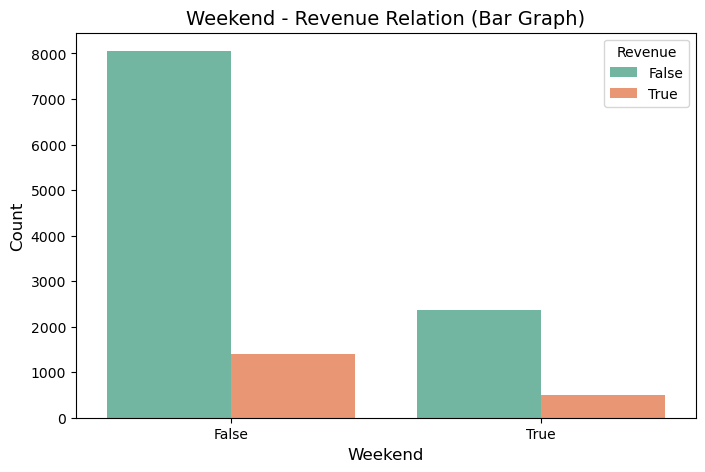

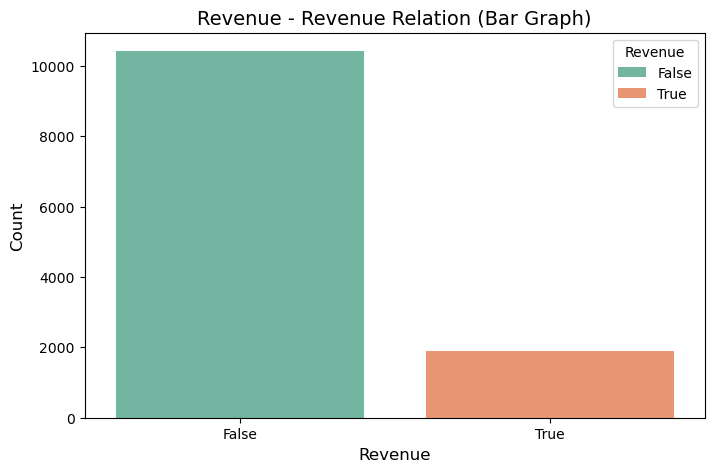

In [13]:
# Plotting bar graph according to relationships between each category in cat_cols and the target feature.

for column in cat_cols:
    plt.figure(figsize=(8, 5))
    sns.countplot(data=data, x=column, hue='Revenue', palette='Set2')
    plt.title(f'{column} - Revenue Relation (Bar Graph)', fontsize=14)
    plt.xlabel(column, fontsize=12)
    plt.ylabel('Count', fontsize=12)
    plt.legend(title='Revenue', loc='upper right')
    plt.show()

__Analysis of Numerical Features and Their Relationship with Revenue__

In [14]:
for col in num_cols:
    print(col)

Administrative
Administrative_Duration
Informational
Informational_Duration
ProductRelated
ProductRelated_Duration
BounceRates
ExitRates
PageValues


In [15]:
# Looking distrubition of each numerical columns.

data.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.00,12330.00,12330.00,12330.00,12330.00,12330.00,12330.00,12330.00,12330.00,12330.00,12330.00,12330.00,12330.00,12330.00
mean,2.32,80.82,0.50,34.47,31.73,1194.75,0.02,0.04,5.89,0.06,2.12,2.36,3.15,4.07
std,3.32,176.78,1.27,140.75,44.48,1913.67,0.05,0.05,18.57,0.20,0.91,1.72,2.40,4.03
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,1.00,1.00
25%,0.00,0.00,0.00,0.00,7.00,184.14,0.00,0.01,0.00,0.00,2.00,2.00,1.00,2.00
50%,1.00,7.50,0.00,0.00,18.00,598.94,0.00,0.03,0.00,0.00,2.00,2.00,3.00,2.00
75%,4.00,93.26,0.00,0.00,38.00,1464.16,0.02,0.05,0.00,0.00,3.00,2.00,4.00,4.00
max,27.00,3398.75,24.00,2549.38,705.00,63973.52,0.20,0.20,361.76,1.00,8.00,13.00,9.00,20.00


count   12330.00
mean        2.32
std         3.32
min         0.00
5%          0.00
10%         0.00
20%         0.00
30%         0.00
40%         0.00
50%         1.00
60%         2.00
70%         3.00
80%         4.00
90%         7.00
95%         9.00
99%        14.00
max        27.00
Name: Administrative, dtype: float64


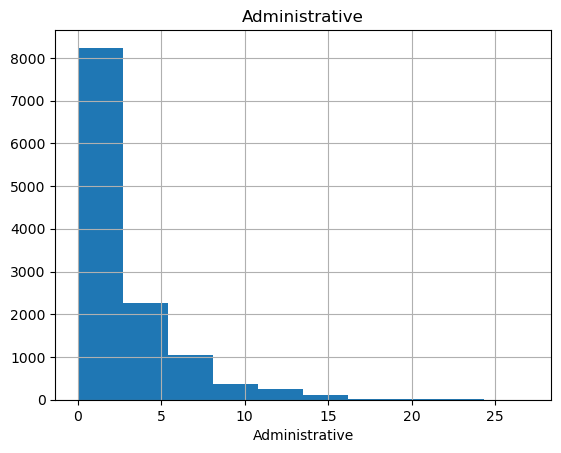

count   12330.00
mean       80.82
std       176.78
min         0.00
5%          0.00
10%         0.00
20%         0.00
30%         0.00
40%         0.00
50%         7.50
60%        37.00
70%        71.20
80%       121.42
90%       224.89
95%       348.27
99%       830.59
max      3398.75
Name: Administrative_Duration, dtype: float64


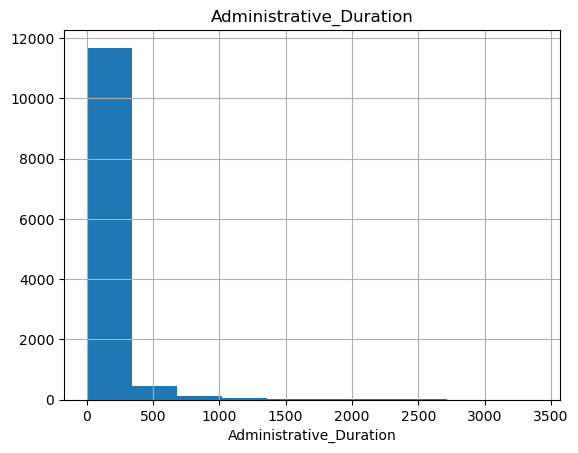

count   12330.00
mean        0.50
std         1.27
min         0.00
5%          0.00
10%         0.00
20%         0.00
30%         0.00
40%         0.00
50%         0.00
60%         0.00
70%         0.00
80%         1.00
90%         2.00
95%         3.00
99%         6.00
max        24.00
Name: Informational, dtype: float64


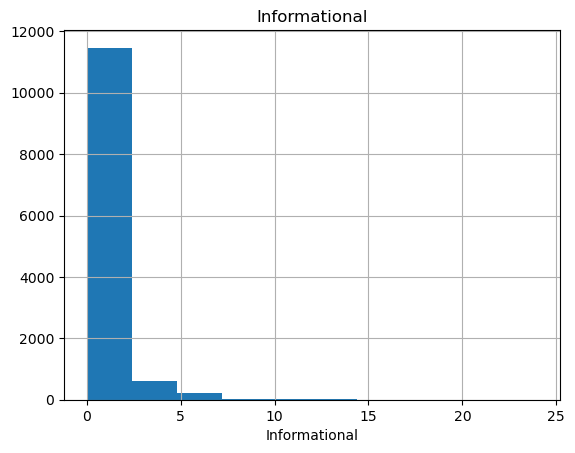

count   12330.00
mean       34.47
std       140.75
min         0.00
5%          0.00
10%         0.00
20%         0.00
30%         0.00
40%         0.00
50%         0.00
60%         0.00
70%         0.00
80%         0.00
90%        72.00
95%       195.00
99%       716.39
max      2549.38
Name: Informational_Duration, dtype: float64


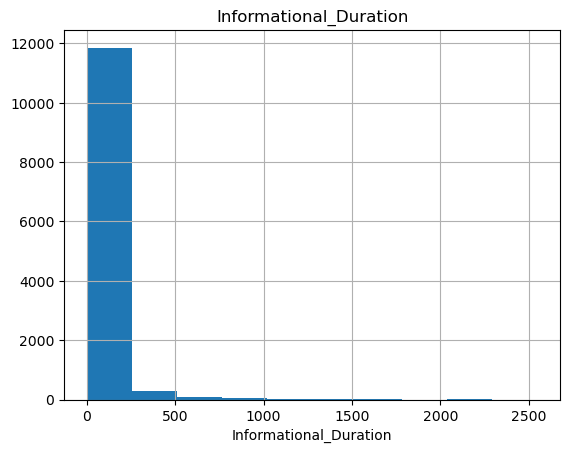

count   12330.00
mean       31.73
std        44.48
min         0.00
5%          1.00
10%         3.00
20%         6.00
30%         9.00
40%        13.00
50%        18.00
60%        24.00
70%        32.00
80%        45.00
90%        74.00
95%       109.00
99%       221.00
max       705.00
Name: ProductRelated, dtype: float64


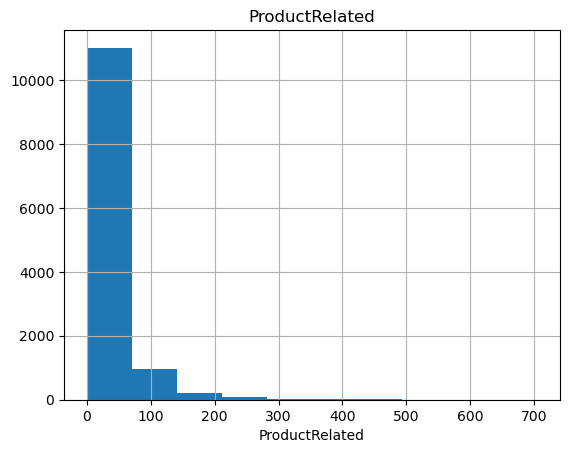

count   12330.00
mean     1194.75
std      1913.67
min         0.00
5%          0.00
10%        36.00
20%       129.00
30%       246.98
40%       402.12
50%       598.94
60%       852.00
70%      1227.01
80%      1775.93
90%      2877.86
95%      4300.29
99%      8701.14
max     63973.52
Name: ProductRelated_Duration, dtype: float64


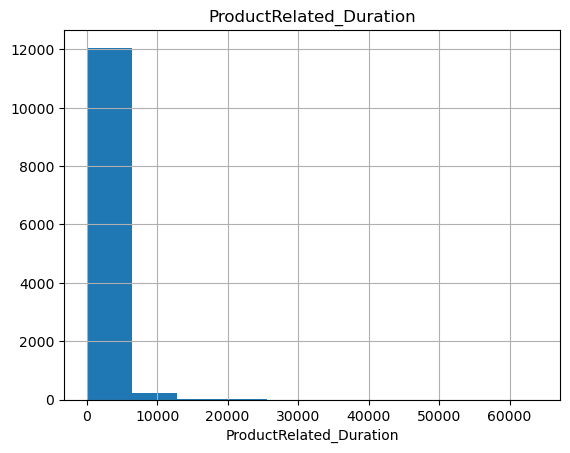

count   12330.00
mean        0.02
std         0.05
min         0.00
5%          0.00
10%         0.00
20%         0.00
30%         0.00
40%         0.00
50%         0.00
60%         0.01
70%         0.01
80%         0.02
90%         0.06
95%         0.20
99%         0.20
max         0.20
Name: BounceRates, dtype: float64


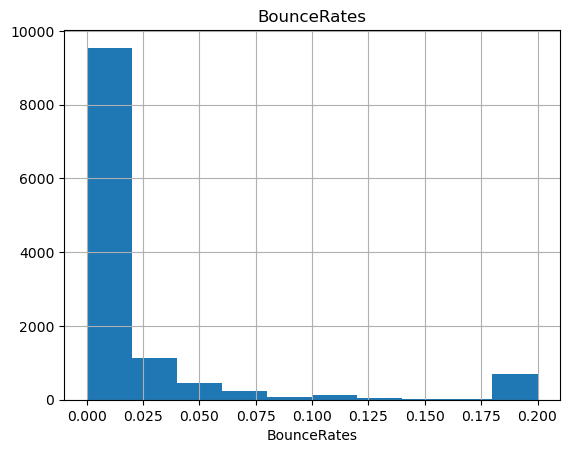

count   12330.00
mean        0.04
std         0.05
min         0.00
5%          0.00
10%         0.01
20%         0.01
30%         0.02
40%         0.02
50%         0.03
60%         0.03
70%         0.04
80%         0.06
90%         0.10
95%         0.20
99%         0.20
max         0.20
Name: ExitRates, dtype: float64


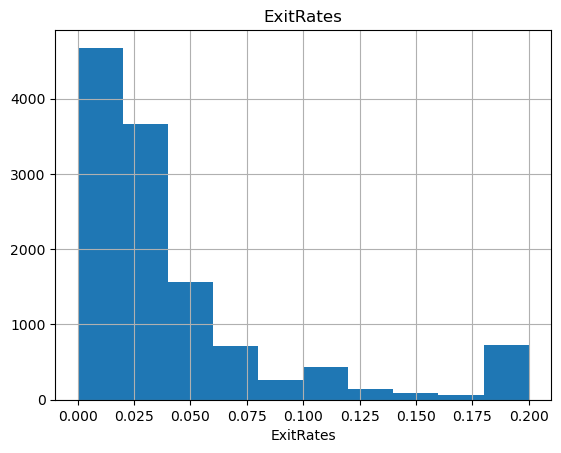

count   12330.00
mean        5.89
std        18.57
min         0.00
5%          0.00
10%         0.00
20%         0.00
30%         0.00
40%         0.00
50%         0.00
60%         0.00
70%         0.00
80%         3.06
90%        18.86
95%        38.16
99%        85.50
max       361.76
Name: PageValues, dtype: float64


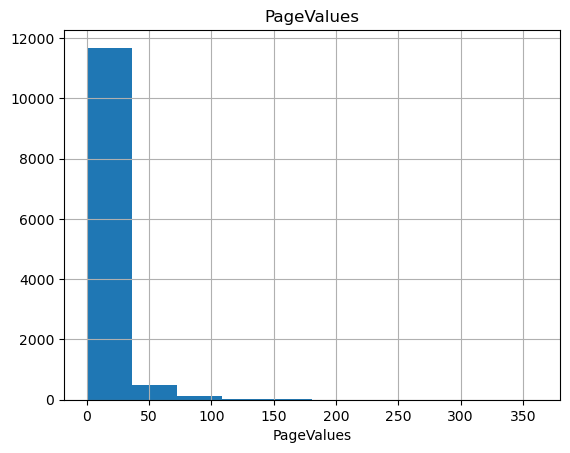

In [16]:
# Plotting distrubition of each numerical columns according to different quantiles.

def num_summary(dataframe, numerical_col, plot=False):
    quantiles = [0.05, 0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90, 0.95, 0.99]
    print(dataframe[numerical_col].describe(quantiles).T)

    if plot:
        dataframe[numerical_col].hist()
        plt.xlabel(numerical_col)
        plt.title(numerical_col)
        plt.show(block=True)

for col in num_cols:
    num_summary(data, col, plot=True)

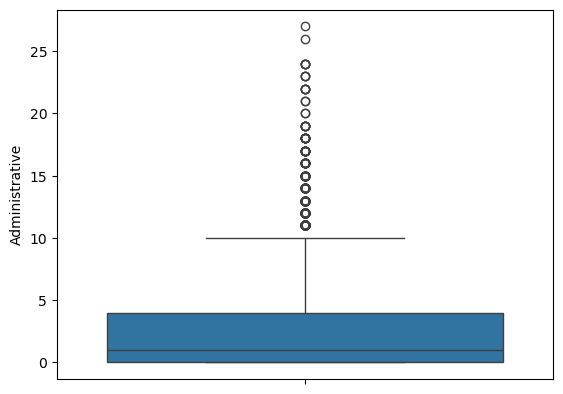

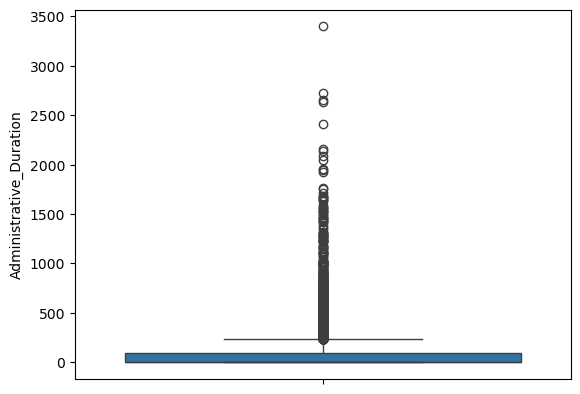

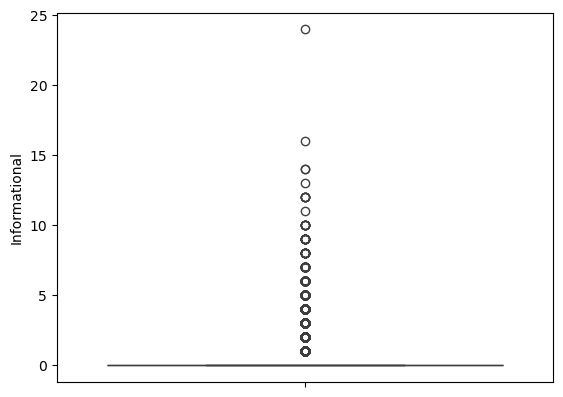

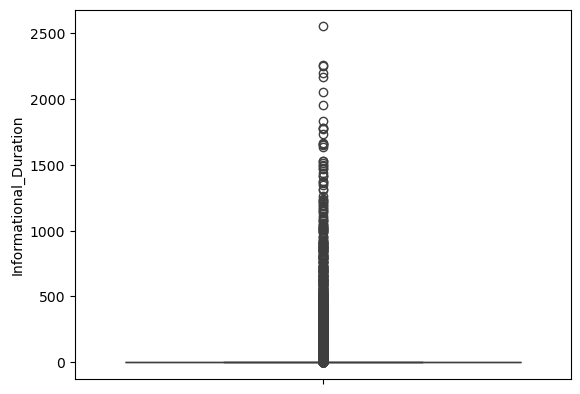

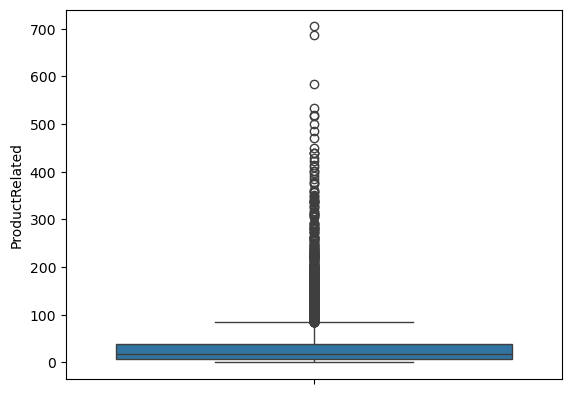

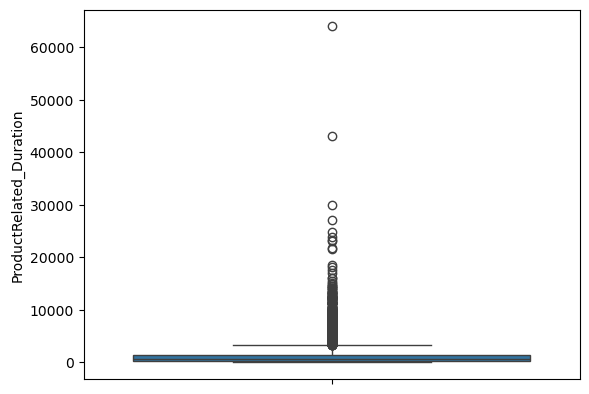

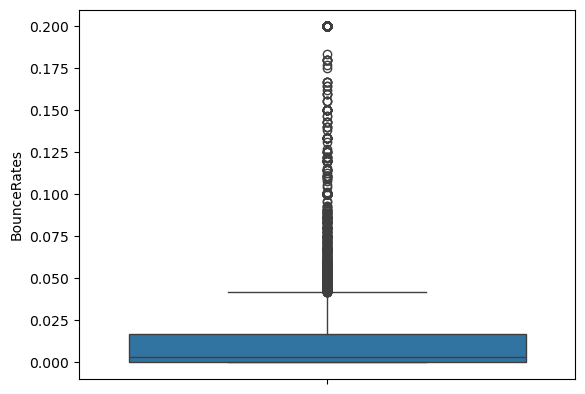

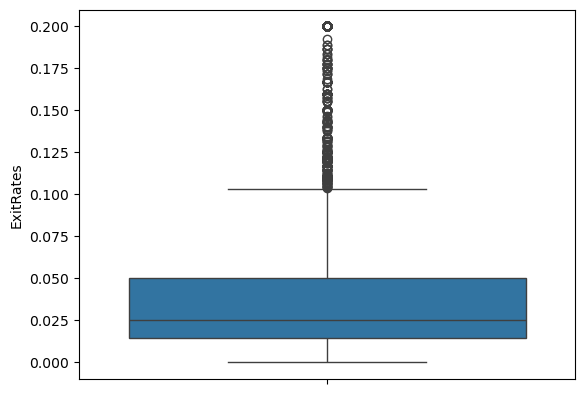

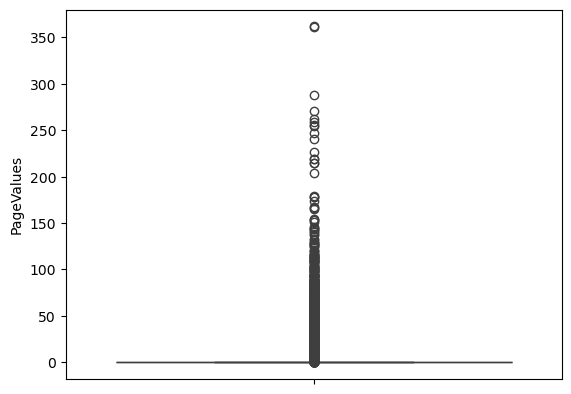

In [17]:
# Looking outliers with plotting boxplot.

for col in num_cols:
    sns.boxplot(data[col])
    plt.show()

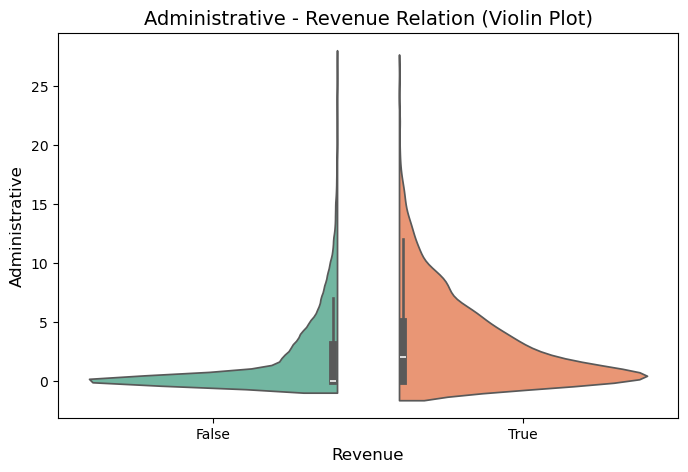

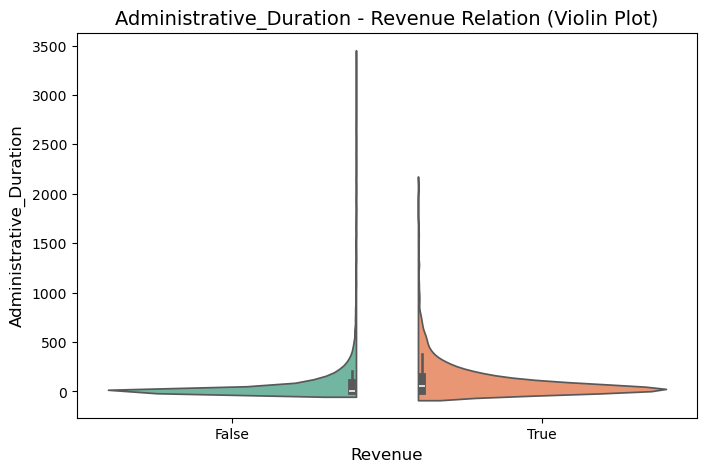

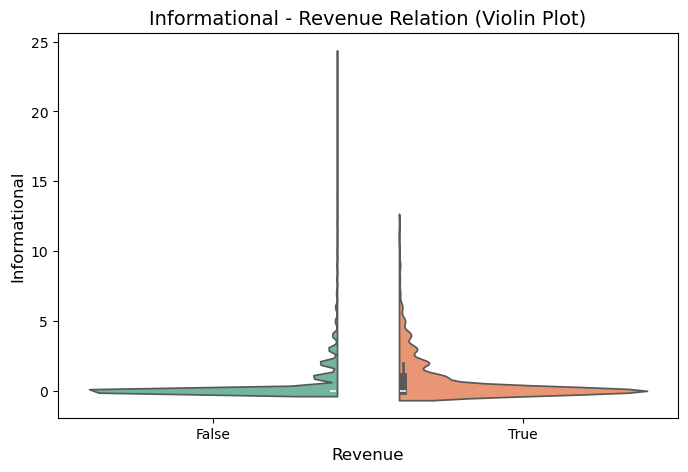

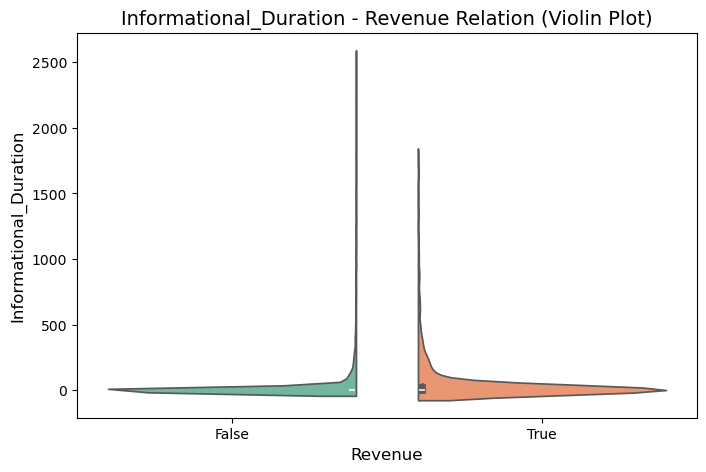

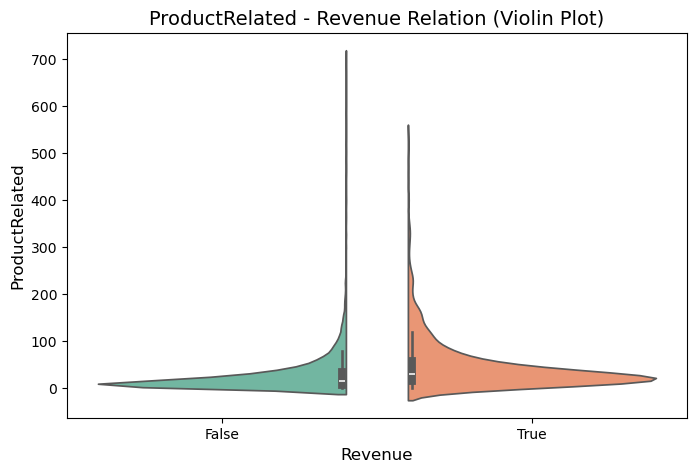

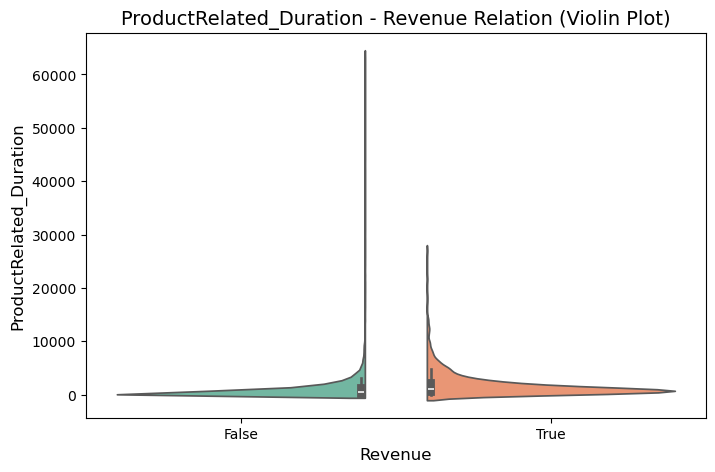

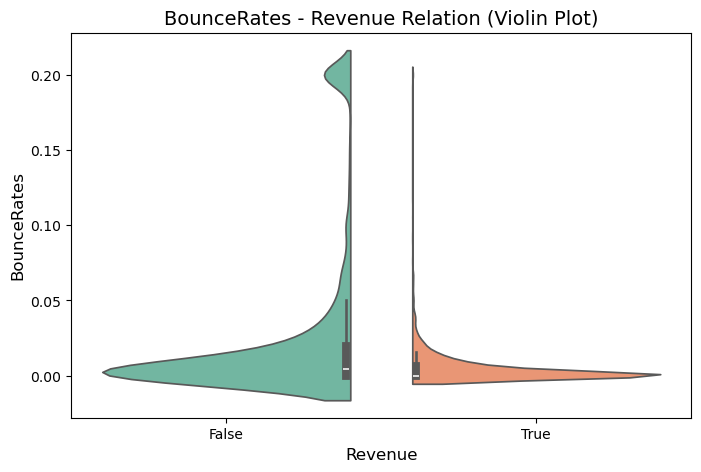

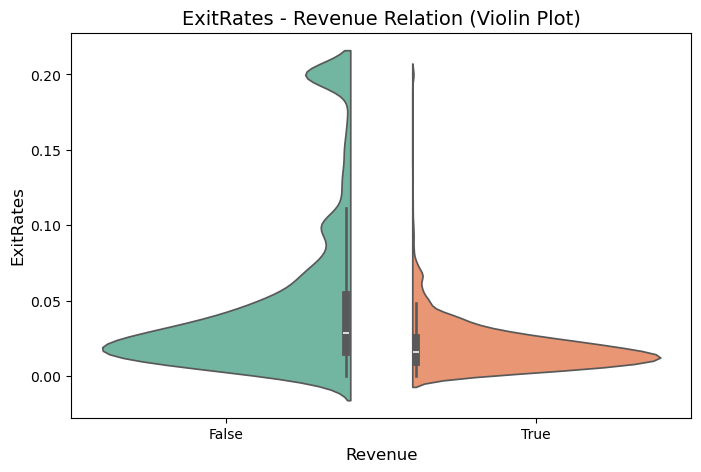

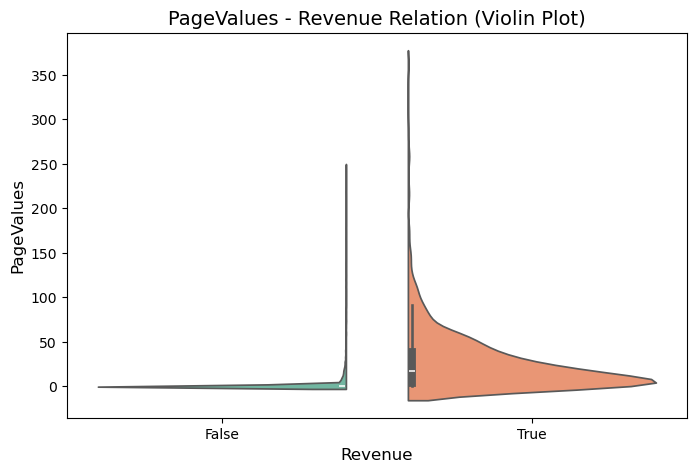

In [18]:
# Plotting violinplot to see relation between numerical column and target.

for column in num_cols:
    plt.figure(figsize=(8, 5))
    sns.violinplot(data=data, x='Revenue', y=column, palette='Set2', split=True)
    plt.title(f'{column} - Revenue Relation (Violin Plot)', fontsize=14)
    plt.xlabel('Revenue', fontsize=12)
    plt.ylabel(column, fontsize=12)
    plt.show()

**Heatmap**

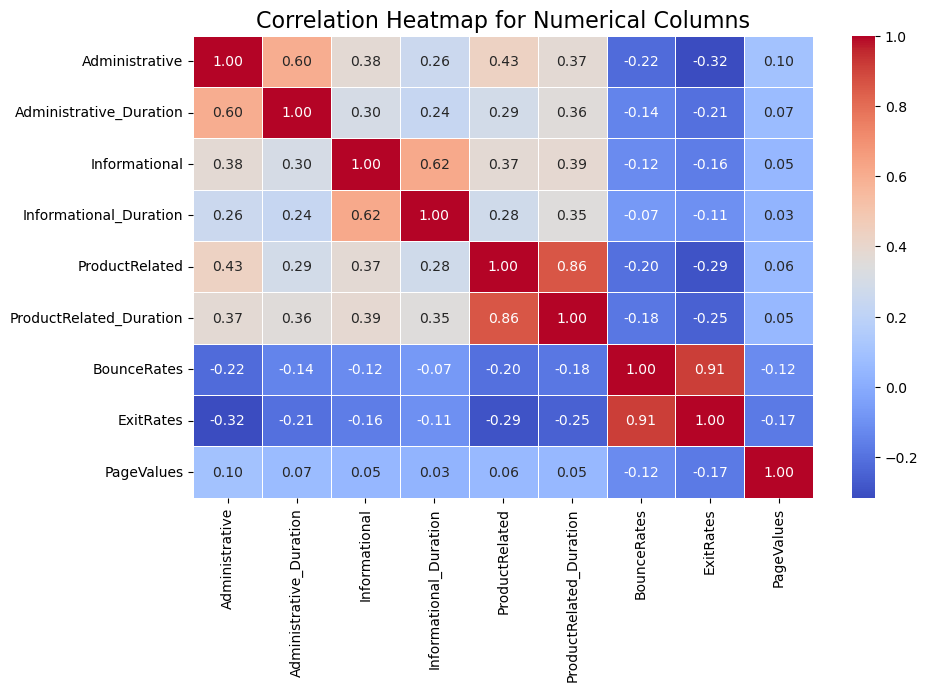

In [19]:
num_corr = data[num_cols]

# Compute the correlation matrix for the selected columns
correlation_matrix = num_corr.corr()

# Plot the heatmap
plt.figure(figsize=(10, 6))  # Adjust the size as needed
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)

# Add title and labels
plt.title("Correlation Heatmap for Numerical Columns", fontsize=16)
plt.show()

# Preprocessing


**Removing Duplicates**

In [20]:
data = data.drop_duplicates()
duplicate_count = data.duplicated().sum()
print(f"Duplicate rows: {duplicate_count}")

Duplicate rows: 0


__Splitting Data__

In [21]:
X = data.drop('Revenue', axis=1)
y = data['Revenue']

target = 'Revenue'

# Removing 'Revenue' from cat_cols
cat_cols = [col for col in cat_cols if col != target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

__Column Transformer__

In [22]:
scaler = RobustScaler()
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

# Create a ColumnTransformer, fitting only on training data
transformer = ColumnTransformer(
    transformers=[
        ('num', scaler, num_cols),
        ('cat', encoder, cat_cols),
    ])

transformer.fit_transform(X_train)
print(transformer.get_feature_names_out())

['num__Administrative' 'num__Administrative_Duration' 'num__Informational'
 'num__Informational_Duration' 'num__ProductRelated'
 'num__ProductRelated_Duration' 'num__BounceRates' 'num__ExitRates'
 'num__PageValues' 'cat__Month_Aug' 'cat__Month_Dec' 'cat__Month_Feb'
 'cat__Month_Jul' 'cat__Month_June' 'cat__Month_Mar' 'cat__Month_May'
 'cat__Month_Nov' 'cat__Month_Oct' 'cat__Month_Sep'
 'cat__VisitorType_New_Visitor' 'cat__VisitorType_Other'
 'cat__VisitorType_Returning_Visitor' 'cat__SpecialDay_0.0'
 'cat__SpecialDay_0.2' 'cat__SpecialDay_0.4' 'cat__SpecialDay_0.6'
 'cat__SpecialDay_0.8' 'cat__SpecialDay_1.0' 'cat__OperatingSystems_1'
 'cat__OperatingSystems_2' 'cat__OperatingSystems_3'
 'cat__OperatingSystems_4' 'cat__OperatingSystems_5'
 'cat__OperatingSystems_6' 'cat__OperatingSystems_7'
 'cat__OperatingSystems_8' 'cat__Browser_1' 'cat__Browser_2'
 'cat__Browser_3' 'cat__Browser_4' 'cat__Browser_5' 'cat__Browser_6'
 'cat__Browser_7' 'cat__Browser_8' 'cat__Browser_9' 'cat__Browser_10

In [23]:
X_train_transformed = transformer.fit_transform(X_train)

# Now transform the test data using the same fitted transformer (without refitting)
X_test_transformed = transformer.transform(X_test)

# Get feature names from the transformer
feature_names = transformer.get_feature_names_out()

# Convert the transformed data to DataFrame
X_train_transformed_df = pd.DataFrame(X_train_transformed, columns=feature_names[:X_train_transformed.shape[1]])
X_test_transformed_df = pd.DataFrame(X_test_transformed, columns=feature_names[:X_test_transformed.shape[1]])

# Display the transformed training and test data
print(X_train_transformed_df.head())
print(X_test_transformed_df.head())

   num__Administrative  num__Administrative_Duration  num__Informational  \
0                -0.25                         -0.11                0.00   
1                -0.25                         -0.11                0.00   
2                 1.50                          1.96                1.00   
3                 1.50                          2.41                0.00   
4                -0.25                         -0.11                0.00   

   num__Informational_Duration  num__ProductRelated  num__ProductRelated_Duration  \
0                         0.00                -0.40                         -0.37   
1                         0.00                 2.30                          0.46   
2                        71.25                -0.10                         -0.13   
3                         0.00                -0.13                         -0.21   
4                         0.00                -0.37                          0.87   

   num__BounceRates  num__ExitRa

In [24]:
from imblearn.over_sampling import SMOTENC

categorical_indices = [
    i for i, feature in enumerate(feature_names)
    if feature.startswith('cat__')  # Prefix used by OneHotEncoder in ColumnTransformer
]

# Apply SMOTENC
smote = SMOTENC(categorical_features=categorical_indices, random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train_transformed_df, y_train)

# Convert resampled data back to DataFrame for better readability
X_resampled_df = pd.DataFrame(X_resampled, columns=feature_names[:X_resampled.shape[1]])

# Display the resampled data
print("Resampled training data:")
print(X_resampled_df.head())
print("Resampled target variable distribution:")
print(y_resampled.value_counts())

Resampled training data:
   num__Administrative  num__Administrative_Duration  num__Informational  \
0                -0.25                         -0.11                0.00   
1                -0.25                         -0.11                0.00   
2                 1.50                          1.96                1.00   
3                 1.50                          2.41                0.00   
4                -0.25                         -0.11                0.00   

   num__Informational_Duration  num__ProductRelated  num__ProductRelated_Duration  \
0                         0.00                -0.40                         -0.37   
1                         0.00                 2.30                          0.46   
2                        71.25                -0.10                         -0.13   
3                         0.00                -0.13                         -0.21   
4                         0.00                -0.37                          0.87   

   num_

**Handling Class Imbalances**

In [25]:
# Applying Synthetic Minority Over-sampling Technique to handle imbalance in target.

smote = SMOTE(random_state=42)

X_train_resampled, y_train_resampled = smote.fit_resample(X_train_transformed_df, y_train)

print(f"After SMOTE, class distribution: {Counter(y_train_resampled)}")

After SMOTE, class distribution: Counter({False: 8218, True: 8218})


**Future Importances**

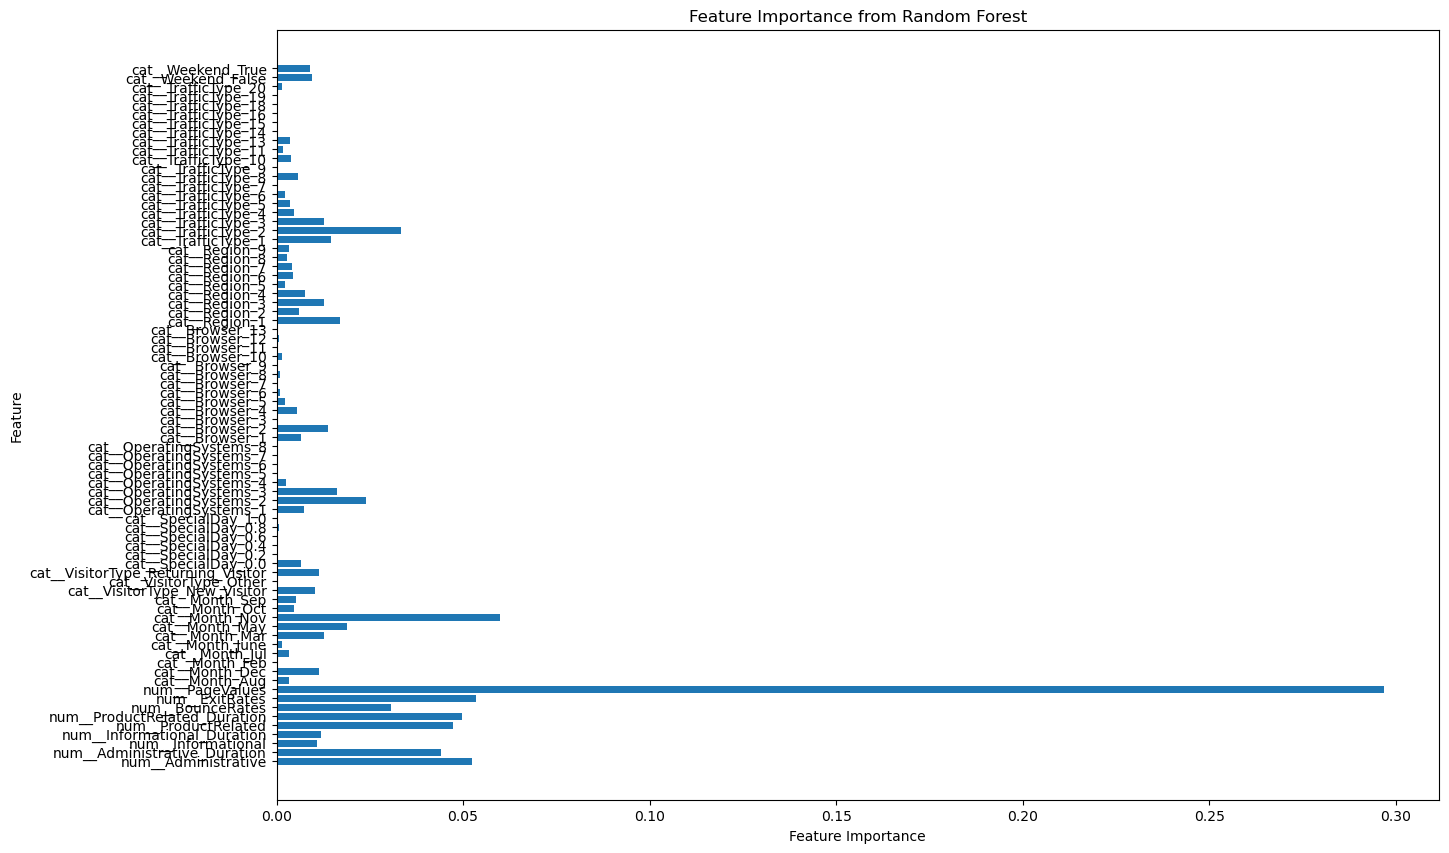

In [26]:
# Looking importances of each columns of transformed and resampled data.

model = RandomForestClassifier(random_state=42)
model.fit(X_train_resampled, y_train_resampled)

importances = model.feature_importances_

# Creating a bar plot for feature importance
plt.figure(figsize=(15, 10))
plt.barh(X_train_resampled.columns, importances)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance from Random Forest')
plt.show()


In [27]:
# Looking Top 10 important and Top 10 least important features.

feature_importance_df = pd.DataFrame({
    'Feature': X_train_resampled.columns,
    'Importance': importances
})
feature_importance_df_sorted = feature_importance_df.sort_values(by='Importance', ascending=False)

# Displaying the sorted DataFrame
print("Top 10 Important Features:")
print(feature_importance_df_sorted.head(10))

print("\nTop 10 Least Important Features:")
print(feature_importance_df_sorted.tail(10))



Top 10 Important Features:
                         Feature  Importance
8                num__PageValues        0.30
16                cat__Month_Nov        0.06
7                 num__ExitRates        0.05
0            num__Administrative        0.05
5   num__ProductRelated_Duration        0.05
4            num__ProductRelated        0.05
1   num__Administrative_Duration        0.04
59            cat__TrafficType_2        0.03
6               num__BounceRates        0.03
29       cat__OperatingSystems_2        0.02

Top 10 Least Important Features:
                    Feature  Importance
11           cat__Month_Feb        0.00
66       cat__TrafficType_9        0.00
33  cat__OperatingSystems_6        0.00
46          cat__Browser_11        0.00
70      cat__TrafficType_14        0.00
71      cat__TrafficType_15        0.00
74      cat__TrafficType_19        0.00
32  cat__OperatingSystems_5        0.00
44           cat__Browser_9        0.00
73      cat__TrafficType_18        0.00


**Feature Selection**

In [28]:
# Evaluating the performance of a Random Forest model by selecting features,
#based on different importance thresholds and calculating the mean cross-validation F1 scores. 

thresholds = [0.00001, 0.0001, 0.001, 0.01, 0.1, 0]

model = RandomForestClassifier(random_state = 42)

cv_results = {}

for threshold in thresholds:
    selected_features = [col for col, importance in zip(X_train_resampled.columns, importances) if importance > threshold]
    
    if len(selected_features) == 0:
        continue
    
    X_train_subset = X_train_resampled[selected_features]
    
    scores = cross_val_score(model, X_train_subset, y_train_resampled, cv=5, scoring = make_scorer(f1_score))
    
    cv_results[threshold] = scores.mean()

for threshold, mean_score in cv_results.items():
    print(f"Threshold: {threshold}, Mean Cross-Validation Score: {mean_score}")


Threshold: 1e-05, Mean Cross-Validation Score: 0.9006534046320928
Threshold: 0.0001, Mean Cross-Validation Score: 0.9036677831892337
Threshold: 0.001, Mean Cross-Validation Score: 0.9019232193231499
Threshold: 0.01, Mean Cross-Validation Score: 0.9209386259222903
Threshold: 0.1, Mean Cross-Validation Score: 0.8050259560501651
Threshold: 0, Mean Cross-Validation Score: 0.9016455072968215


In [29]:
# Finding the threshold with the highest mean score

best_threshold = max(cv_results, key=cv_results.get)

# Print the best threshold and its corresponding mean score
print(f"Best Threshold: {best_threshold}, Mean Cross-Validation Score: {cv_results[best_threshold]}")

Best Threshold: 0.01, Mean Cross-Validation Score: 0.9209386259222903


In [30]:
# Future selection according to best_threshold

selected_features = [col for col, importance in zip(X_train_resampled.columns, importances) if importance > best_threshold]

print("Selected features based on threshold:", selected_features)

Selected features based on threshold: ['num__Administrative', 'num__Administrative_Duration', 'num__Informational', 'num__Informational_Duration', 'num__ProductRelated', 'num__ProductRelated_Duration', 'num__BounceRates', 'num__ExitRates', 'num__PageValues', 'cat__Month_Dec', 'cat__Month_Mar', 'cat__Month_May', 'cat__Month_Nov', 'cat__VisitorType_New_Visitor', 'cat__VisitorType_Returning_Visitor', 'cat__OperatingSystems_2', 'cat__OperatingSystems_3', 'cat__Browser_2', 'cat__Region_1', 'cat__Region_3', 'cat__TrafficType_1', 'cat__TrafficType_2', 'cat__TrafficType_3']


In [31]:
# Rearranging columns of X_train and X_test according to feature selection

X_train_selected = X_train_resampled[selected_features]
X_test_selected = X_test_transformed_df[selected_features] 
X_train_selected.columns
X_test_selected.columns

Index(['num__Administrative', 'num__Administrative_Duration', 'num__Informational',
       'num__Informational_Duration', 'num__ProductRelated', 'num__ProductRelated_Duration',
       'num__BounceRates', 'num__ExitRates', 'num__PageValues', 'cat__Month_Dec', 'cat__Month_Mar',
       'cat__Month_May', 'cat__Month_Nov', 'cat__VisitorType_New_Visitor',
       'cat__VisitorType_Returning_Visitor', 'cat__OperatingSystems_2', 'cat__OperatingSystems_3',
       'cat__Browser_2', 'cat__Region_1', 'cat__Region_3', 'cat__TrafficType_1',
       'cat__TrafficType_2', 'cat__TrafficType_3'],
      dtype='object')

In [32]:
for column in X_test_selected.columns:
    print(column)

num__Administrative
num__Administrative_Duration
num__Informational
num__Informational_Duration
num__ProductRelated
num__ProductRelated_Duration
num__BounceRates
num__ExitRates
num__PageValues
cat__Month_Dec
cat__Month_Mar
cat__Month_May
cat__Month_Nov
cat__VisitorType_New_Visitor
cat__VisitorType_Returning_Visitor
cat__OperatingSystems_2
cat__OperatingSystems_3
cat__Browser_2
cat__Region_1
cat__Region_3
cat__TrafficType_1
cat__TrafficType_2
cat__TrafficType_3


In [33]:
X_train_selected.shape

(16436, 23)

In [34]:
X_train_selected.head()

,num__Administrative,num__Administrative_Duration,num__Informational,num__Informational_Duration,num__ProductRelated,num__ProductRelated_Duration,num__BounceRates,num__ExitRates,num__PageValues,cat__Month_Dec,cat__Month_Mar,cat__Month_May,cat__Month_Nov,cat__VisitorType_New_Visitor,cat__VisitorType_Returning_Visitor,cat__OperatingSystems_2,cat__OperatingSystems_3,cat__Browser_2,cat__Region_1,cat__Region_3,cat__TrafficType_1,cat__TrafficType_2,cat__TrafficType_3
0,-0.25,-0.11,0.00,0.00,-0.40,-0.37,-0.18,0.24,0.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00
1,-0.25,-0.11,0.00,0.00,2.30,0.46,-0.18,-0.67,38.00,0.00,0.00,0.00,1.00,1.00,0.00,1.00,0.00,1.00,1.00,0.00,0.00,1.00,0.00
2,1.50,1.96,1.00,71.25,-0.10,-0.13,-0.18,-0.27,0.00,1.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,1.00,1.00,0.00,0.00,1.00,0.00
3,1.50,2.41,0.00,0.00,-0.13,-0.21,3.40,1.74,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,1.00
4,-0.25,-0.11,0.00,0.00,-0.37,0.87,2.11,0.40,0.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00


# Model Building and Evaluating

## Support Vector Machine


**Hyperparameter Tuning**

In [35]:
# Fiding best parameters of SVC with RandomizedSearchCV

param_grid = {
    'C': [0.1, 1, 5, 10],                           
    'kernel': ['rbf'],               
}


random_search = RandomizedSearchCV(
    estimator=SVC(probability=True),  
    param_distributions=param_grid,
    n_iter=100, 
    cv=5,  
    n_jobs=-1,  
    scoring='f1', 
    random_state=42 
)


random_search.fit(X_train_selected, y_train_resampled)


print("Best parameters:", random_search.best_params_)
print(f"Best Cross-Validation F1 Score: {random_search.best_score_}")

Best parameters: {'kernel': 'rbf', 'C': 10}
Best Cross-Validation F1 Score: 0.8189651250234483


**Building and Evaluating**

In [36]:
## Building SVC with best parameters.

best_params = random_search.best_params_
svc_model = SVC(**best_params, probability = True)

svc_model.fit(X_train_selected, y_train_resampled)

y_train_pred = svc_model.predict(X_train_selected)
y_test_pred = svc_model.predict(X_test_selected)

y_train_pred_proba = svc_model.predict_proba(X_train_selected)
y_test_pred_proba = svc_model.predict_proba(X_test_selected)

train_accuracy_svc = accuracy_score(y_train_resampled, y_train_pred)
train_precision_svc = precision_score(y_train_resampled, y_train_pred, average='weighted')
train_recall_svc = recall_score(y_train_resampled, y_train_pred, average='weighted')
train_f1_svc = f1_score(y_train_resampled, y_train_pred, average='weighted')
train_mcc_svc = matthews_corrcoef(y_train_resampled, y_train_pred)
train_roc_auc_svc = roc_auc_score(y_train_resampled, y_train_pred_proba[:, 1]) 
train_avg_precision_svc = average_precision_score(y_train_resampled, y_train_pred_proba[:, 1])


test_accuracy_svc = accuracy_score(y_test, y_test_pred)
test_precision_svc = precision_score(y_test, y_test_pred, average='weighted')
test_recall_svc = recall_score(y_test, y_test_pred, average='weighted')
test_f1_svc = f1_score(y_test, y_test_pred, average='weighted')
test_mcc_svc = matthews_corrcoef(y_test, y_test_pred)
test_roc_auc_svc = roc_auc_score(y_test, y_test_pred_proba[:, 1])  
test_avg_precision_svc = average_precision_score(y_test, y_test_pred_proba[:, 1])

print(f"Train Set Metrics:")
print(f"Accuracy: {train_accuracy_svc}")
print(f"Precision (Weighted): {train_precision_svc}")
print(f"Recall (Weighted): {train_recall_svc}")
print(f"F1 Score (Weighted): {train_f1_svc}")
print(f"Train Set Metrics:")
print(f"Matthews Correlation Coefficient (MCC): {train_mcc_svc}")
print(f"ROC AUC: {train_roc_auc_svc}")
print(f"Average Precision Score: {train_avg_precision_svc}")

print(f"\nTest Set Metrics:")
print(f"Accuracy: {test_accuracy_svc}")
print(f"Precision (Weighted): {test_precision_svc}")
print(f"Recall (Weighted): {test_recall_svc}")
print(f"F1 Score (Weighted): {test_f1_svc}")
print(f"Matthews Correlation Coefficient (MCC): {test_mcc_svc}")
print(f"ROC AUC: {test_roc_auc_svc}")
print(f"Average Precision Score: {test_avg_precision_svc}")

print("\nConfusion Matrix (Test Set):")
print(confusion_matrix(y_test, y_test_pred))

print("\nClassification Report (Test Set):")
print(classification_report(y_test, y_test_pred))

Train Set Metrics:
Accuracy: 0.8329885616938428
Precision (Weighted): 0.8383976764296222
Recall (Weighted): 0.8329885616938428
F1 Score (Weighted): 0.8323184857648821
Train Set Metrics:
Matthews Correlation Coefficient (MCC): 0.6713644481348064
ROC AUC: 0.9109251080957039
Average Precision Score: 0.8916188970384352

Test Set Metrics:
Accuracy: 0.870954526833265
Precision (Weighted): 0.8908719600231264
Recall (Weighted): 0.870954526833265
F1 Score (Weighted): 0.8782599532941431
Matthews Correlation Coefficient (MCC): 0.5594973597321927
ROC AUC: 0.8957889869492079
Average Precision Score: 0.6350077761790913

Confusion Matrix (Test Set):
[[1861  218]
 [  97  265]]

Classification Report (Test Set):
              precision    recall  f1-score   support

       False       0.95      0.90      0.92      2079
        True       0.55      0.73      0.63       362

    accuracy                           0.87      2441
   macro avg       0.75      0.81      0.77      2441
weighted avg       0.89

## Random Forest

**Hyperparameter Tuning**

In [37]:
# Fiding best parameters of RandomForestClassifier with RandomizedSearchCV

param_grid = {
    'n_estimators': [90, 100, 115, 130],                                      
    'max_features': ['auto', 'log2'],                
    'max_depth': range(2,20,1),                     
    'min_samples_split': range(2,10,1),                    
    'min_samples_leaf': range(1,10,1),                      
    'criterion': ['gini', 'entropy'],                                         
}

random_search = RandomizedSearchCV(estimator=RandomForestClassifier(), param_distributions=param_grid, n_iter=100, cv=5, n_jobs=-1, scoring='f1')

random_search.fit(X_train_selected, y_train_resampled)

print("Best parameters:", random_search.best_params_)
print(f"Best Cross-Validation F1 Score: {random_search.best_score_}")

Best parameters: {'n_estimators': 130, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'log2', 'max_depth': 16, 'criterion': 'gini'}
Best Cross-Validation F1 Score: 0.9175483360943092


**Building and Evaluation**

In [38]:
## Building Random Forest with best parameters.

best_params = random_search.best_params_
rf_model = RandomForestClassifier(**best_params)

rf_model.fit(X_train_selected, y_train_resampled)

y_train_pred = rf_model.predict(X_train_selected)
y_test_pred = rf_model.predict(X_test_selected)

y_train_pred_proba = rf_model.predict_proba(X_train_selected)
y_test_pred_proba = rf_model.predict_proba(X_test_selected)

train_accuracy_rf = accuracy_score(y_train_resampled, y_train_pred)
train_precision_rf = precision_score(y_train_resampled, y_train_pred, average='weighted')
train_recall_rf = recall_score(y_train_resampled, y_train_pred, average='weighted')
train_f1_rf = f1_score(y_train_resampled, y_train_pred, average='weighted')
train_mcc_rf = matthews_corrcoef(y_train_resampled, y_train_pred)
train_roc_auc_rf = roc_auc_score(y_train_resampled, y_train_pred_proba[:, 1]) 
train_avg_precision_rf = average_precision_score(y_train_resampled, y_train_pred_proba[:, 1])


test_accuracy_rf = accuracy_score(y_test, y_test_pred)
test_precision_rf = precision_score(y_test, y_test_pred, average='weighted')
test_recall_rf = recall_score(y_test, y_test_pred, average='weighted')
test_f1_rf = f1_score(y_test, y_test_pred, average='weighted')
test_mcc_rf = matthews_corrcoef(y_test, y_test_pred)
test_roc_auc_rf = roc_auc_score(y_test, y_test_pred_proba[:, 1])  
test_avg_precision_rf = average_precision_score(y_test, y_test_pred_proba[:, 1])


print(f"Train Set Metrics:")
print(f"Accuracy: {train_accuracy_rf}")
print(f"Precision (Weighted): {train_precision_rf}")
print(f"Recall (Weighted): {train_recall_rf}")
print(f"F1 Score (Weighted): {train_f1_rf}")
print(f"Matthews Correlation Coefficient (MCC): {train_mcc_rf}")
print(f"ROC AUC: {train_roc_auc_rf}")
print(f"Average Precision Score: {train_avg_precision_rf}")

print(f"\nTest Set Metrics:")
print(f"Accuracy: {test_accuracy_rf}")
print(f"Precision (Weighted): {test_precision_rf}")
print(f"Recall (Weighted): {test_recall_rf}")
print(f"F1 Score (Weighted): {test_f1_rf}")
print(f"Matthews Correlation Coefficient (MCC): {test_mcc_rf}")
print(f"ROC AUC: {test_roc_auc_rf}")
print(f"Average Precision Score: {test_avg_precision_rf}")

print("\nConfusion Matrix (Test Set):")
print(confusion_matrix(y_test, y_test_pred))

print("\nClassification Report (Test Set):")
print(classification_report(y_test, y_test_pred))

Train Set Metrics:
Accuracy: 0.9802871744950109
Precision (Weighted): 0.9802889950773571
Recall (Weighted): 0.9802871744950109
F1 Score (Weighted): 0.9802871558141456
Matthews Correlation Coefficient (MCC): 0.9605761695706428
ROC AUC: 0.998746822487081
Average Precision Score: 0.998782889252516

Test Set Metrics:
Accuracy: 0.8914379352724293
Precision (Weighted): 0.8936100900533248
Recall (Weighted): 0.8914379352724293
F1 Score (Weighted): 0.8924604098031913
Matthews Correlation Coefficient (MCC): 0.5786323194721643
ROC AUC: 0.9216952476620984
Average Precision Score: 0.6959199539790953

Confusion Matrix (Test Set):
[[1938  141]
 [ 124  238]]

Classification Report (Test Set):
              precision    recall  f1-score   support

       False       0.94      0.93      0.94      2079
        True       0.63      0.66      0.64       362

    accuracy                           0.89      2441
   macro avg       0.78      0.79      0.79      2441
weighted avg       0.89      0.89      0.8

### Logistic Regression

**Hyperparameter Tuning with GridSearchCV**

In [39]:
# Fiding best parameters of LogisticRegression with GridSearchCV

param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l2', 'l1'],
    'solver': ['liblinear', 'saga'],
    'max_iter': [100, 200, 300],
}

log_reg = LogisticRegression()

grid_search = GridSearchCV(log_reg, param_grid, cv=5, n_jobs=-1, verbose=1, scoring='f1')
grid_search.fit(X_train_selected, y_train_resampled)
               
               
print("Best parameters:", grid_search.best_params_)
print(f"Best Cross-Validation F1 Score: {grid_search.best_score_}")

Fitting 5 folds for each of 60 candidates, totalling 300 fits


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max

Best parameters: {'C': 0.01, 'max_iter': 100, 'penalty': 'l1', 'solver': 'saga'}
Best Cross-Validation F1 Score: 0.8430560750738758


**Building and Evaluation**

In [40]:
## Building LogisticRegression with best parameters.

best_params = grid_search.best_params_
log = LogisticRegression(**best_params)

log.fit(X_train_selected, y_train_resampled)

y_train_pred = log.predict(X_train_selected)
y_test_pred = log.predict(X_test_selected)

y_train_pred_proba = log.predict_proba(X_train_selected)
y_test_pred_proba = log.predict_proba(X_test_selected)

train_accuracy_log = accuracy_score(y_train_resampled, y_train_pred)
train_precision_log = precision_score(y_train_resampled, y_train_pred, average='weighted')
train_recall_log = recall_score(y_train_resampled, y_train_pred, average='weighted')
train_f1_log  = f1_score(y_train_resampled, y_train_pred, average='weighted')
train_mcc_log = matthews_corrcoef(y_train_resampled, y_train_pred)
train_roc_auc_log = roc_auc_score(y_train_resampled, y_train_pred_proba[:, 1]) 
train_avg_precision_log = average_precision_score(y_train_resampled, y_train_pred_proba[:, 1])

test_accuracy_log = accuracy_score(y_test, y_test_pred)
test_precision_log = precision_score(y_test, y_test_pred, average='weighted')
test_recall_log = recall_score(y_test, y_test_pred, average='weighted')
test_f1_log = f1_score(y_test, y_test_pred, average='weighted')
test_mcc_log = matthews_corrcoef(y_test, y_test_pred)
test_roc_auc_log = roc_auc_score(y_test, y_test_pred_proba[:, 1])  
test_avg_precision_log = average_precision_score(y_test, y_test_pred_proba[:, 1])

print(f"Train Set Metrics:")
print(f"Accuracy: {train_accuracy_log}")
print(f"Precision (Weighted): {train_precision_log}")
print(f"Recall (Weighted): {train_recall_log}")
print(f"F1 Score (Weighted): {train_f1_log}")
print(f"Matthews Correlation Coefficient (MCC): {train_mcc_log}")
print(f"ROC AUC: {train_roc_auc_log}")
print(f"Average Precision Score: {train_avg_precision_log}")

print(f"\nTest Set Metrics:")
print(f"Accuracy: {test_accuracy_log}")
print(f"Precision (Weighted): {test_precision_log}")
print(f"Recall (Weighted): {test_recall_log}")
print(f"F1 Score (Weighted): {test_f1_log}")
print(f"Matthews Correlation Coefficient (MCC): {test_mcc_log}")
print(f"ROC AUC: {test_roc_auc_log}")
print(f"Average Precision Score: {test_avg_precision_log}")


print("\nConfusion Matrix (Test Set):")
print(confusion_matrix(y_test, y_test_pred))

print("\nClassification Report (Test Set):")
print(classification_report(y_test, y_test_pred))

Train Set Metrics:
Accuracy: 0.8468605500121684
Precision (Weighted): 0.84875068816577
Recall (Weighted): 0.8468605500121684
F1 Score (Weighted): 0.8466527744782819
Matthews Correlation Coefficient (MCC): 0.695608670199851
ROC AUC: 0.8976334291860976
Average Precision Score: 0.8938274119297098

Test Set Metrics:
Accuracy: 0.8668578451454322
Precision (Weighted): 0.8939131742683004
Recall (Weighted): 0.8668578451454322
F1 Score (Weighted): 0.8761089876852742
Matthews Correlation Coefficient (MCC): 0.5663590676156034
ROC AUC: 0.8870698566831163
Average Precision Score: 0.639394837169707

Confusion Matrix (Test Set):
[[1838  241]
 [  84  278]]

Classification Report (Test Set):
              precision    recall  f1-score   support

       False       0.96      0.88      0.92      2079
        True       0.54      0.77      0.63       362

    accuracy                           0.87      2441
   macro avg       0.75      0.83      0.77      2441
weighted avg       0.89      0.87      0.88 

## XGBOOST


**Hyperparameter tuning with GridSearchCV**

In [41]:
# Fiding best parameters of XGBClassifier with GridSearchCV

param_grid = {
    "subsample": [0.5, 0.75, 1],
    "colsample_bytree": [0.5, 0.75, 1],
    "max_depth": [2, 4, 6, 8],
    "min_child_weight": [1, 5, 15, 100],
    "learning_rate": [0.3, 0.1, 0.01],
    "n_estimators": [50, 100, 150]
}


In [42]:
xgb = XGBClassifier()

grid_search = GridSearchCV(xgb, param_grid, cv=5, n_jobs=-1, verbose=1, scoring='f1')
grid_search.fit(X_train_selected, y_train_resampled)
               
               
print("Best parameters:", grid_search.best_params_)
print(f"Best Cross-Validation F1 Score: {grid_search.best_score_}")

Fitting 5 folds for each of 1296 candidates, totalling 6480 fits
Best parameters: {'colsample_bytree': 1, 'learning_rate': 0.01, 'max_depth': 8, 'min_child_weight': 1, 'n_estimators': 150, 'subsample': 0.5}
Best Cross-Validation F1 Score: 0.9091611395263183


**Building and Evaluation**

In [43]:
## Building XGBClassifier with best parameters.

best_params = grid_search.best_params_
xgb = XGBClassifier(**best_params)

xgb.fit(X_train_selected, y_train_resampled)

y_train_pred = xgb.predict(X_train_selected)
y_test_pred = xgb.predict(X_test_selected)

y_train_pred_proba = xgb.predict_proba(X_train_selected)
y_test_pred_proba = xgb.predict_proba(X_test_selected)

train_accuracy_xgb = accuracy_score(y_train_resampled, y_train_pred)
train_precision_xgb = precision_score(y_train_resampled, y_train_pred, average='weighted')
train_recall_xgb = recall_score(y_train_resampled, y_train_pred, average='weighted')
train_f1_xgb = f1_score(y_train_resampled, y_train_pred, average='weighted')
train_mcc_xgb = matthews_corrcoef(y_train_resampled, y_train_pred)
train_roc_auc_xgb = roc_auc_score(y_train_resampled, y_train_pred_proba[:, 1]) 
train_avg_precision_xgb = average_precision_score(y_train_resampled, y_train_pred_proba[:, 1])

test_accuracy_xgb = accuracy_score(y_test, y_test_pred)
test_precision_xgb = precision_score(y_test, y_test_pred, average='weighted')
test_recall_xgb = recall_score(y_test, y_test_pred, average='weighted')
test_f1_xgb = f1_score(y_test, y_test_pred, average='weighted')
test_mcc_xgb = matthews_corrcoef(y_test, y_test_pred)
test_roc_auc_xgb = roc_auc_score(y_test, y_test_pred_proba[:, 1])  
test_avg_precision_xgb = average_precision_score(y_test, y_test_pred_proba[:, 1])

print(f"Train Set Metrics:")
print(f"Accuracy: {train_accuracy_xgb}")
print(f"Precision (Weighted): {train_precision_xgb}")
print(f"Recall (Weighted): {train_recall_xgb}")
print(f"F1 Score (Weighted): {train_f1_xgb}")
print(f"Matthews Correlation Coefficient (MCC): {train_mcc_xgb}")
print(f"ROC AUC: {train_roc_auc_xgb}")
print(f"Average Precision Score: {train_avg_precision_xgb}")

print(f"\nTest Set Metrics:")
print(f"Accuracy: {test_accuracy_xgb}")
print(f"Precision (Weighted): {test_precision_xgb}")
print(f"Recall (Weighted): {test_recall_xgb}")
print(f"F1 Score (Weighted): {test_f1_xgb}")
print(f"Matthews Correlation Coefficient (MCC): {test_mcc_xgb}")
print(f"ROC AUC: {test_roc_auc_xgb}")
print(f"Average Precision Score: {test_avg_precision_xgb}")


print("\nConfusion Matrix (Test Set):")
print(confusion_matrix(y_test, y_test_pred))

print("\nClassification Report (Test Set):")
print(classification_report(y_test, y_test_pred))

Train Set Metrics:
Accuracy: 0.9380627889997566
Precision (Weighted): 0.9380628927822678
Recall (Weighted): 0.9380627889997566
F1 Score (Weighted): 0.9380627853313338
Matthews Correlation Coefficient (MCC): 0.8761256817820184
ROC AUC: 0.9869135019963717
Average Precision Score: 0.9876179247752814

Test Set Metrics:
Accuracy: 0.8930766079475625
Precision (Weighted): 0.8990278907765213
Recall (Weighted): 0.8930766079475625
F1 Score (Weighted): 0.8956201356116075
Matthews Correlation Coefficient (MCC): 0.5988430560595928
ROC AUC: 0.9283202984860442
Average Precision Score: 0.7140188593827239

Confusion Matrix (Test Set):
[[1926  153]
 [ 108  254]]

Classification Report (Test Set):
              precision    recall  f1-score   support

       False       0.95      0.93      0.94      2079
        True       0.62      0.70      0.66       362

    accuracy                           0.89      2441
   macro avg       0.79      0.81      0.80      2441
weighted avg       0.90      0.89      0

## Stacking Model

**Building and Evaluation**

In [44]:
# Building stacking_classifier with base models; SVC, RandomForest, XGB,
# with meta model LogisticRegression.

stacking_classifier = StackingClassifier(
    estimators=[
        ('svc', svc_model),
        ('random_forest', rf_model),
        ('xgb', xgb)
    ],
    final_estimator=LogisticRegression()
)


stacking_classifier.fit(X_train_selected, y_train_resampled)

y_train_pred = stacking_classifier.predict(X_train_selected)
y_test_pred = stacking_classifier.predict(X_test_selected)

y_train_pred_proba = stacking_classifier.predict_proba(X_train_selected)
y_test_pred_proba = stacking_classifier.predict_proba(X_test_selected)

train_accuracy_st = accuracy_score(y_train_resampled, y_train_pred)
train_precision_st = precision_score(y_train_resampled, y_train_pred, average='weighted')
train_recall_st = recall_score(y_train_resampled, y_train_pred, average='weighted')
train_f1_st = f1_score(y_train_resampled, y_train_pred, average='weighted')
train_mcc_st = matthews_corrcoef(y_train_resampled, y_train_pred)
train_roc_auc_st = roc_auc_score(y_train_resampled, y_train_pred_proba[:, 1]) 
train_avg_precision_st = average_precision_score(y_train_resampled, y_train_pred_proba[:, 1])


test_accuracy_st = accuracy_score(y_test, y_test_pred)
test_precision_st = precision_score(y_test, y_test_pred, average='weighted')
test_recall_st = recall_score(y_test, y_test_pred, average='weighted')
test_f1_st = f1_score(y_test, y_test_pred, average='weighted')
test_mcc_st = matthews_corrcoef(y_test, y_test_pred)
test_roc_auc_st = roc_auc_score(y_test, y_test_pred_proba[:, 1])  
test_avg_precision_st = average_precision_score(y_test, y_test_pred_proba[:, 1])

print(f"Train Set Metrics:")
print(f"Accuracy: {train_accuracy_st}")
print(f"Precision (Weighted): {train_precision_st}")
print(f"Recall (Weighted): {train_recall_st}")
print(f"F1 Score (Weighted): {train_f1_st}")
print(f"Matthews Correlation Coefficient (MCC): {train_mcc_st}")
print(f"ROC AUC: {train_roc_auc_st}")
print(f"Average Precision Score: {train_avg_precision_st}")

print(f"\nTest Set Metrics:")
print(f"Accuracy: {test_accuracy_st}")
print(f"Precision (Weighted): {test_precision_st}")
print(f"Recall (Weighted): {test_recall_st}")
print(f"F1 Score (Weighted): {test_f1_st}")
print(f"Matthews Correlation Coefficient (MCC): {test_mcc_st}")
print(f"ROC AUC: {test_roc_auc_st}")
print(f"Average Precision Score: {test_avg_precision_st}")

print("\nConfusion Matrix (Test Set):")
print(confusion_matrix(y_test, y_test_pred))

print("\nClassification Report (Test Set):")
print(classification_report(y_test, y_test_pred))

Train Set Metrics:
Accuracy: 0.9823558043319542
Precision (Weighted): 0.9823970615142825
Recall (Weighted): 0.9823558043319542
F1 Score (Weighted): 0.9823554270673415
Matthews Correlation Coefficient (MCC): 0.9647528649640652
ROC AUC: 0.9992026122430027
Average Precision Score: 0.9992216615175757

Test Set Metrics:
Accuracy: 0.8906185989348627
Precision (Weighted): 0.896105770844998
Recall (Weighted): 0.8906185989348627
F1 Score (Weighted): 0.8930050858131473
Matthews Correlation Coefficient (MCC): 0.5875345958174417
ROC AUC: 0.9233481885415586
Average Precision Score: 0.6960373688733168

Confusion Matrix (Test Set):
[[1925  154]
 [ 113  249]]

Classification Report (Test Set):
              precision    recall  f1-score   support

       False       0.94      0.93      0.94      2079
        True       0.62      0.69      0.65       362

    accuracy                           0.89      2441
   macro avg       0.78      0.81      0.79      2441
weighted avg       0.90      0.89      0.

## Test Scores

In [45]:
test_scores = {
    'Model': ['Logistic Regression', 'Random Forest', 'Stacking', 'XGBoost', 'SVC'],
    'F1': [test_f1_log, test_f1_rf, test_f1_st, test_f1_xgb, test_f1_svc],
    'Accuracy': [test_accuracy_log, test_accuracy_rf, test_accuracy_st, test_accuracy_xgb, test_accuracy_svc],
    'Precision': [test_precision_log, test_precision_rf, test_precision_st, test_precision_xgb, test_precision_svc],
    'Recall': [test_recall_log, test_recall_rf, test_recall_st, test_recall_xgb, test_recall_svc],
    'MCC': [test_mcc_log, test_mcc_rf, test_mcc_st, test_mcc_xgb, test_mcc_svc],
    'ROC AUC': [test_roc_auc_log, test_roc_auc_rf, test_roc_auc_st, test_roc_auc_xgb, test_roc_auc_svc],
    'APS': [test_avg_precision_log, test_avg_precision_rf, test_avg_precision_st, test_avg_precision_xgb, test_avg_precision_svc],
}

In [46]:
test_df = pd.DataFrame(test_scores)
test_df

,Model,F1,Accuracy,Precision,Recall,MCC,ROC AUC,APS
0,Logistic Regression,0.88,0.87,0.89,0.87,0.57,0.89,0.64
1,Random Forest,0.89,0.89,0.89,0.89,0.58,0.92,0.70
2,Stacking,0.89,0.89,0.90,0.89,0.59,0.92,0.70
3,XGBoost,0.90,0.89,0.90,0.89,0.60,0.93,0.71
4,SVC,0.88,0.87,0.89,0.87,0.56,0.90,0.64


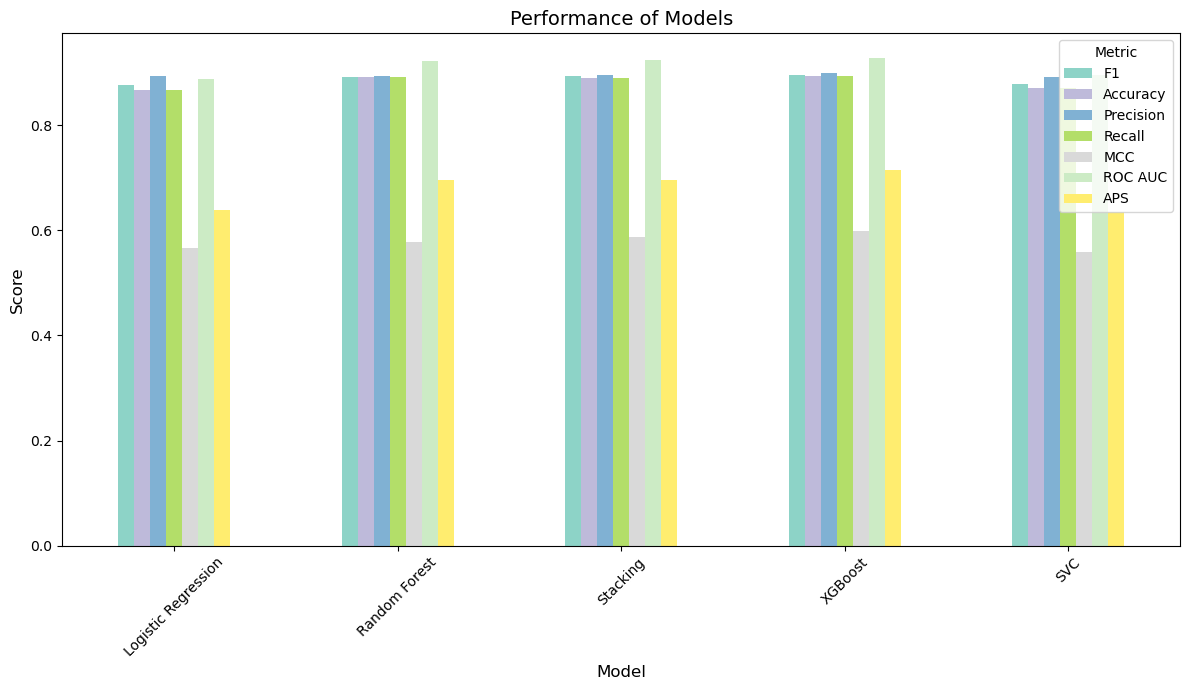

In [47]:
test_df.set_index('Model').plot(kind='bar', figsize=(12, 7), colormap='Set3')
plt.title('Performance of Models', fontsize=14)
plt.ylabel('Score', fontsize=12)
plt.xlabel('Model', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Metric', fontsize=10)
plt.tight_layout()
plt.show()

## Visualization of F1 Scores

In [48]:
f1_scores = {
    'Model': ['Logistic Regression', 'Random Forest', 'Stacking', 'XGBoost', 'SVC'],
    'Train F1': [train_f1_log, train_f1_rf, train_f1_st, train_f1_xgb, train_f1_svc],
    'Test F1': [test_f1_log, test_f1_rf, test_f1_st, test_f1_xgb, test_f1_svc],
}

In [49]:
f1_df = pd.DataFrame(f1_scores)
f1_df

,Model,Train F1,Test F1
0,Logistic Regression,0.85,0.88
1,Random Forest,0.98,0.89
2,Stacking,0.98,0.89
3,XGBoost,0.94,0.90
4,SVC,0.83,0.88


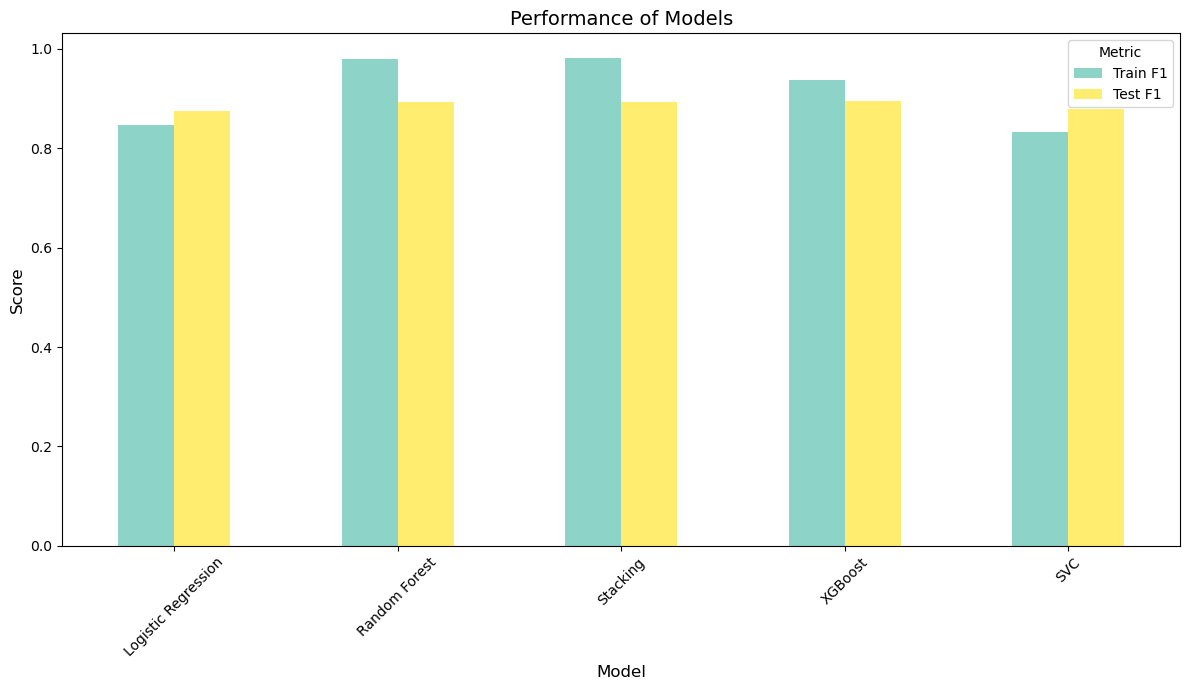

In [50]:
f1_df.set_index('Model').plot(kind='bar', figsize=(12, 7), colormap='Set3')
plt.title('Performance of Models', fontsize=14)
plt.ylabel('Score', fontsize=12)
plt.xlabel('Model', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Metric', fontsize=10)
plt.tight_layout()
plt.show()

##  Visualization of Accuracy

In [51]:
accuracy_scores = {
    'Model': ['Logistic Regression', 'Random Forest', 'Stacking', 'XGBoost', 'SVC'],
    'Accuracy': [test_accuracy_log, test_accuracy_rf, test_accuracy_st, test_accuracy_xgb, test_accuracy_svc],
}

In [52]:
accuracy_df = pd.DataFrame(accuracy_scores)
accuracy_df

,Model,Accuracy
0,Logistic Regression,0.87
1,Random Forest,0.89
2,Stacking,0.89
3,XGBoost,0.89
4,SVC,0.87


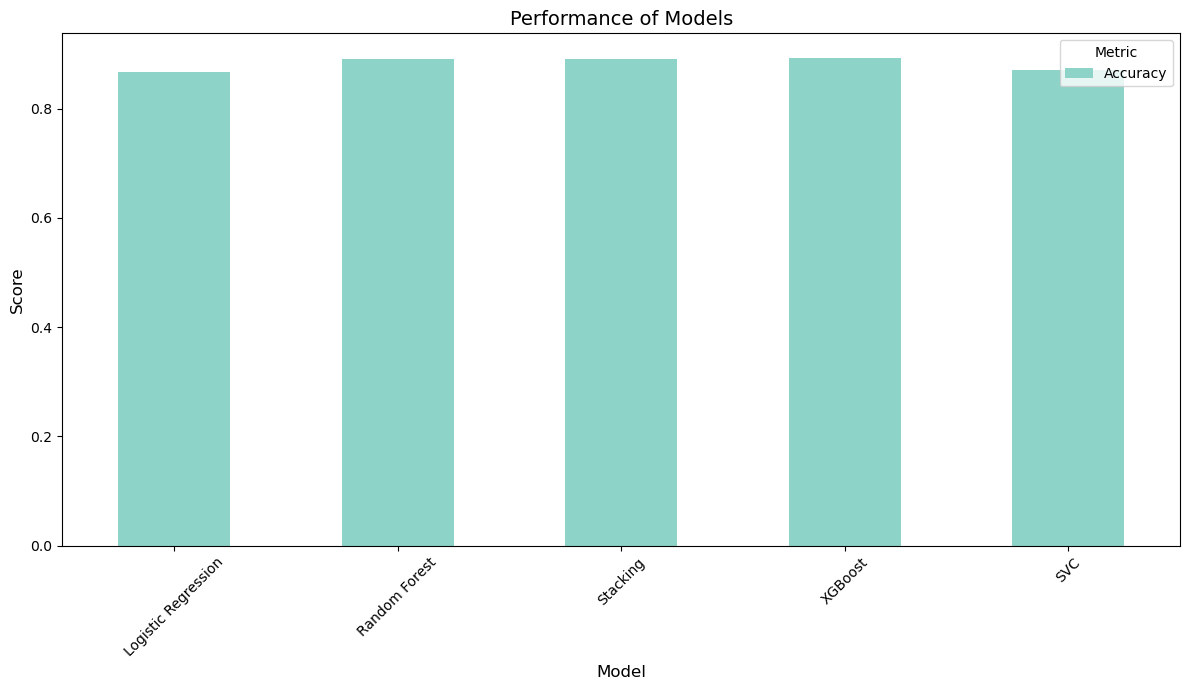

In [53]:
accuracy_df.set_index('Model').plot(kind='bar', figsize=(12, 7), colormap='Set3')
plt.title('Performance of Models', fontsize=14)
plt.ylabel('Score', fontsize=12)
plt.xlabel('Model', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Metric', fontsize=10)
plt.tight_layout()
plt.show()